# Cognifyz Internship Tasks

### Author: Deepthy A
#### Date: 15-03-2025

## **Introduction**
This notebook contains an analysis of restaurant data as part of the Cognifyz Data Analysis Internship. The dataset includes restaurant details such as location, cuisines, ratings, price ranges, and delivery options.

In today's data-driven world, the restaurant industry relies heavily on data analysis to make informed business decisions. This project, conducted as part of the Cognifyz internship, focuses on understanding various aspects of restaurant data, including customer ratings, review characteristics, pricing strategies, and service offerings. By leveraging Python and data visualization techniques, we aim to extract meaningful insights from the dataset and establish relationships between key variables such as price range, review length, aggregate ratings, and the availability of online delivery and table booking services.

Through systematic analysis, we explore how customer perceptions and behaviors are influenced by pricing and service availability. Additionally, the project aims to determine whether higher-priced restaurants are more likely to offer table booking and online delivery, thereby providing actionable insights for restaurant owners and decision-makers in the food industry.

## Cognifyz Internship - Level 1 Data Analysis

### **Tasks Covered:**
1. **Top Cuisines**: Identify the most common cuisines.
2. **City Analysis**: Find the city with the highest number of restaurants and best ratings.
3. **Price Range Distribution**: Visualize price categories.
4. **Online Delivery Analysis**: Compare ratings of restaurants with and without online delivery.


In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load dataset
data = pd.read_csv("Downloads/Dataset.csv")

In [8]:
df = pd.DataFrame(data)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df.shape

(9551, 21)

We successfully loaded the **dataset!** Here are some key observations:

- **9551** rows and **21** columns
- The dataset contains restaurant names, locations, cuisines, ratings, price ranges, votes, and delivery info
- The "Cuisines" column has 9 missing values, which we can handle
- The dataset includes longitude and latitude, which could be useful for mapping

Since the dataset only has 9 missing values out of 9551 rows (~0.09%), so dropping them won’t significantly affect the analysis.
️Cuisines are essential for **Task 1 (Top Cuisines Analysis)** - missing values won’t contribute meaningful insights.
Dropping them ensures accurate counting of cuisine occurrences.

In [15]:
df = df.dropna(subset=['Cuisines'])

In [16]:
df.isnull().sum().sum()

0

## **Task 1: Top Cuisines Analysis**
We will determine:
1. The **top 3 most common cuisines** in the dataset.
2. The **percentage of restaurants serving them**.

In [18]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

Here, we split the 'Cuisines' column into individual cuisines

In [20]:
from collections import Counter
cuisine_list = [c.strip() for sublist in df['Cuisines'].dropna().str.split(',') for c in sublist]

In [21]:
cuisine_counts = Counter(cuisine_list)
most_common_cuisines = cuisine_counts.most_common(3)
most_common_cuisines

[('North Indian', 3960), ('Chinese', 2735), ('Fast Food', 1986)]

In [22]:
top_3_cuisines_percent = [(c, count, (count / len(df)) * 100) for c, count in most_common_cuisines]

top_3_cuisines_percent

[('North Indian', 3960, 41.50073359882624),
 ('Chinese', 2735, 28.66275413959338),
 ('Fast Food', 1986, 20.813246698805283)]

### **Findings:**
Here are the top 3 most common cuisines in the dataset:
- North Indian - 3960 restaurants (41.5%)
- Chinese - 2735 restaurants (28.7%)
- Fast Food - 1986 restaurants (20.8%)

## **Task 2: City Analysis**

In this task, we’ll:

- Find the city with the highest number of restaurants 
- Calculate the average rating for each city
- Identify the city with the highest average rating

In [26]:
city_counts = df['City'].value_counts()
city_counts

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: count, Length: 140, dtype: int64

In [27]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean()
city_avg_rating

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64

In [28]:
top_city = city_counts.idxmax()
top_city

'New Delhi'

In [29]:
top_city_count = city_counts.max()
top_city_count 

5473

In [30]:
highest_rated_city = city_avg_rating.idxmax()
highest_rated_city

'Inner City'

In [31]:
highest_avg_rating = city_avg_rating.max()
highest_avg_rating

4.9

### **Findings:**
- City with the **highest number** of restaurants: **New Delhi (5473 restaurants)**
- City with the **highest average rating**: **Inner City** (4.9 average rating)

## **Task 3: Price Range Distribution**

We'll:

- Create a histogram/bar chart to visualize the price range distribution
- Calculate the percentage of restaurants in each price range

In [35]:
price_range_counts = df['Price range'].value_counts(normalize=True) * 100

In [36]:
price_range_counts

Price range
1    46.510166
2    32.624188
3    14.724376
4     6.141270
Name: proportion, dtype: float64

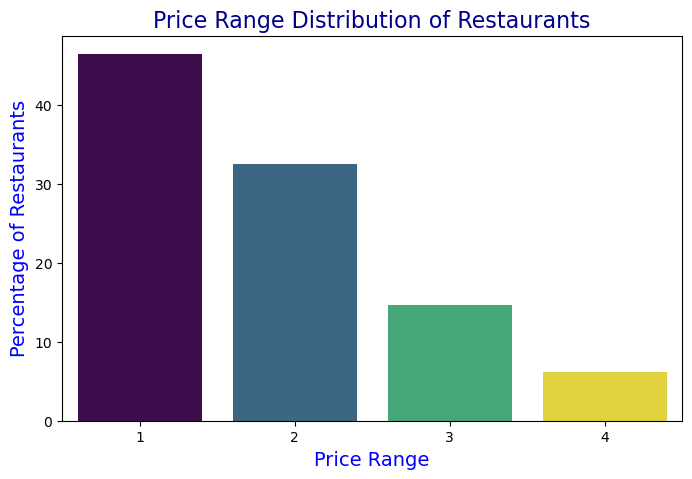

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x=price_range_counts.index,hue=price_range_counts.index, y=price_range_counts.values, 
            palette="viridis",legend=False)
plt.xlabel("Price Range",color='blue',fontsize=14)
plt.ylabel("Percentage of Restaurants",color='blue',fontsize=14)
plt.title("Price Range Distribution of Restaurants",color='darkblue',fontsize=16)
plt.show()

### **Findings:**
Percentage of restaurants in each price range:

* Price Range 1: 46.5% (Most common)
* Price Range 2: 32.6%
* Price Range 3: 14.7%
* Price Range 4: 6.1% (Least common)

Hence, **46.5%** of restaurants fall under **Price Range 1** (affordable). 
**Only 6.1%** of restaurants are in **Price Range 4** (expensive).


## **Task 4: Online Delivery**

In this Task,we have to:

- Find the percentage of restaurants that offer online delivery
- Compare average ratings of restaurants with and without online delivery

In [42]:
online_delivery_counts = df['Has Online delivery'].value_counts(normalize=True) * 100
online_delivery_counts 

Has Online delivery
No     74.313561
Yes    25.686439
Name: proportion, dtype: float64

In [43]:
avg_rating_with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

avg_rating_with_delivery, avg_rating_without_delivery

(3.2488372093023257, 2.4635171343957127)

### **Findings:**
1. Percentage of restaurants offering online delivery:
   - No: 74.3%
   - Yes: 25.7%
2. Average Ratings Comparison:
   - With online delivery: 3.25 ⭐
   - Without online delivery: 2.47 ⭐
  
This shows that restaurants with online delivery tend to have higher ratings on average.

## **LEVEL 2 - Task 1: Restaurant Ratings Analysis**

- Analyze the distribution of aggregate 
ratings and determine the most commo 
rating range- .
Calculate the average number of vo es
received by restaurats.

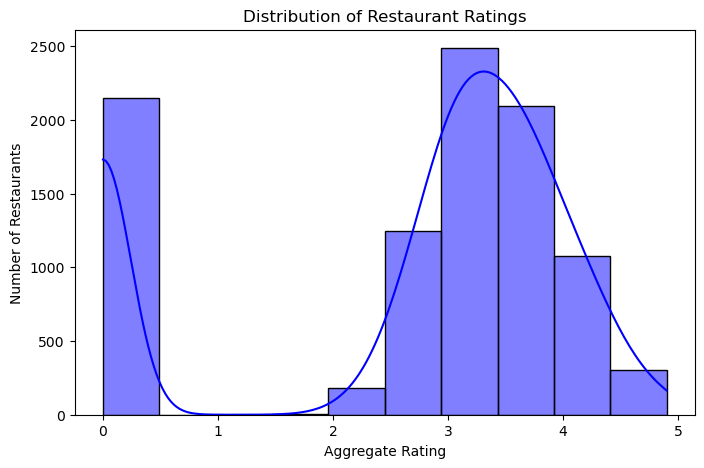

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True, color="blue")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()

In [47]:
most_common_rating = df['Aggregate rating'].mode()[0]
most_common_rating 

0.0

In [48]:
avg_votes = df['Votes'].mean()
avg_votes

156.7720603647034

### **Findings:**
- The histogram provides insight into how ratings are distributed among restaurants.
- The most common rating  is 0.0.
- The average number of votes is 156.78 which reflects how engaged customers are with restaurants.

## **Task 2: Cuisine Combination Analysis**
In this task, we will analyze:
1. The **most common cuisine combinations** in the dataset.
2. Whether certain cuisine combinations **tend to have higher ratings**.

This helps in understanding customer preferences for multi-cuisine restaurants.


In [51]:
cuisine_combinations = df['Cuisines'].value_counts()
cuisine_combinations.head(5)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

In [52]:
cuisine_combinations_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
cuisine_combinations_ratings.head(5)

Cuisines
Italian, Deli              4.9
Hawaiian, Seafood          4.9
American, Sandwich, Tea    4.9
Continental, Indian        4.9
European, Asian, Indian    4.9
Name: Aggregate rating, dtype: float64

### **Findings:**
- The most common cuisine combinations reflect popular restaurant offerings.  North Indian cuisine is dominant, both individually and in combinations with Chinese & Mughlai.
- Some cuisine combinations may be **preferred by customers**, leading to higher ratings. Less common multi-cuisine combinations like Italian-Deli, Hawaiian-Seafood, and Continental-Indian tend to have higher ratings, possibly due to their uniqueness or better-quality service.

## **Task 3: Geographic Analysis**
In this task, we will:
1. **Plot the locations of restaurants on a map** using longitude & latitude.
2. **Identify any patterns or clusters** of restaurants in specific areas.

This helps visualize the geographical distribution of restaurants and possible business hotspots.


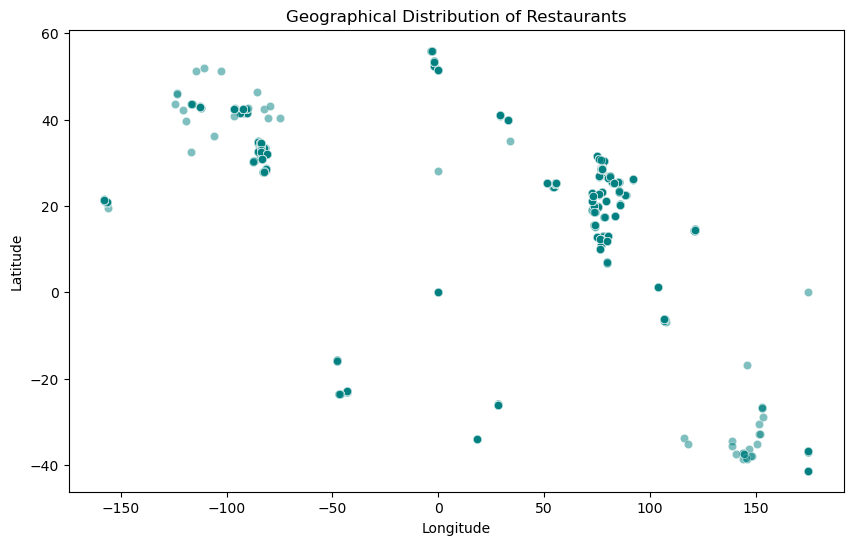

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], alpha=0.5,color='teal')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Restaurants")
plt.show()

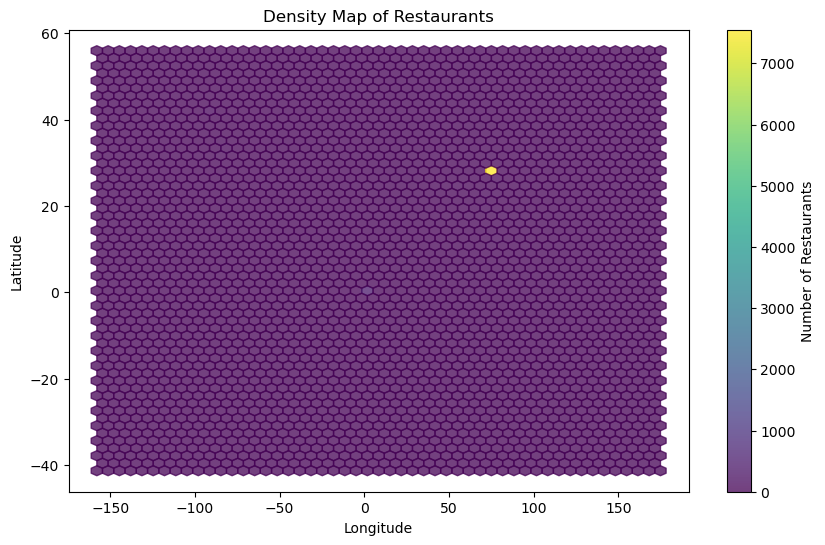

In [56]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Longitude'], df['Latitude'], gridsize=50, alpha=0.75)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Density Map of Restaurants")
plt.colorbar(label="Number of Restaurants")
plt.show()

## **Results:**
- The scatter plot shows how restaurants are geographically distributed.
- The density map highlights **clusters of restaurants**, which could be business hubs or food districts.


## **Task 4: Restaurant Chains Analysis**

In this task, we will:
1. Identify **if there are restaurant chains** present in the dataset.
2. Analyze the **ratings and popularity** of different restaurant chains.

This helps in understanding which restaurant brands dominate the market and how well they are rated.


In [59]:
restaurant_counts = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1]
restaurant_chains.head(10)

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64

In [60]:
df_chains = df[df['Restaurant Name'].isin(restaurant_chains.index)]
chain_avg_ratings = df_chains.groupby('Restaurant Name')['Aggregate rating'].mean().sort_values(ascending=False)
chain_total_votes = df_chains.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
chain_avg_ratings.head(10)

Restaurant Name
Talaga Sampireun             4.900
Silantro Fil-Mex             4.850
AB's Absolute Barbecues      4.850
AB's - Absolute Barbecues    4.825
Naturals Ice Cream           4.800
Gymkhana                     4.700
The Cheesecake Factory       4.650
Dishoom                      4.600
Garota de Ipanema            4.600
Chili's                      4.580
Name: Aggregate rating, dtype: float64

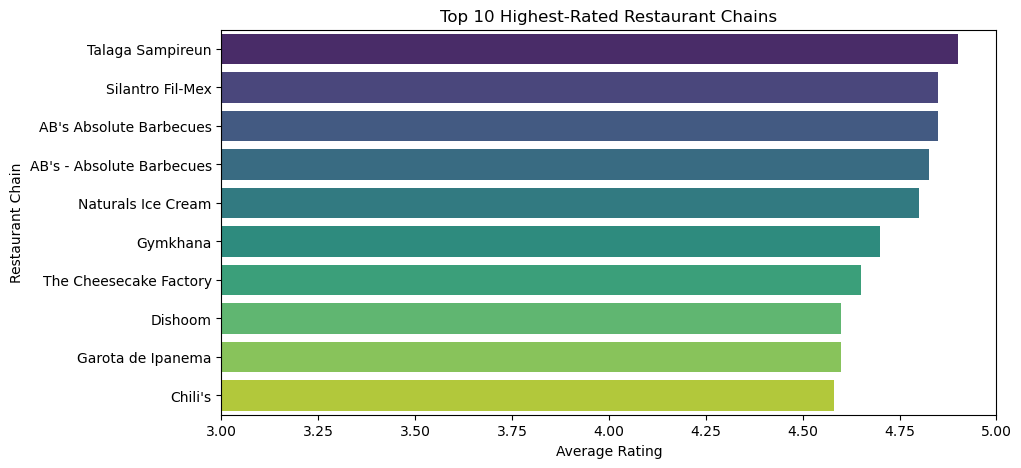

In [61]:
top_10_rated = chain_avg_ratings.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_rated.values,hue =top_10_rated.index, y=top_10_rated.index, palette="viridis",legend =False)
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.title("Top 10 Highest-Rated Restaurant Chains")
plt.xlim(3, 5)  
plt.show()

In [62]:
chain_total_votes.head(10)

Restaurant Name
Barbeque Nation              28142
AB's - Absolute Barbecues    13400
Big Chill                    10853
Farzi Cafe                   10098
Truffles                      9682
Chili's                       8156
Joey's Pizza                  7807
Big Yellow Door               7511
Saravana Bhavan               7238
Starbucks                     7139
Name: Votes, dtype: int64

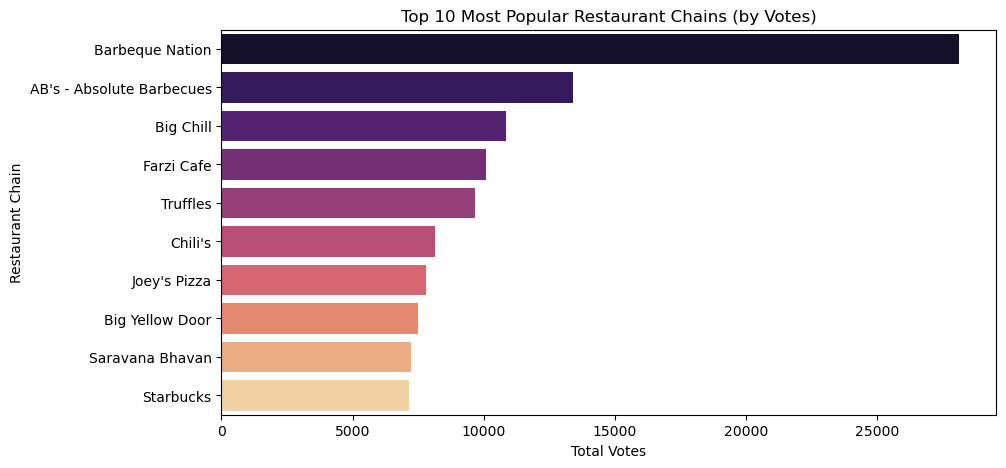

In [63]:
top_10_popular = chain_total_votes.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_popular.values,hue=top_10_popular.index, y=top_10_popular.index, palette="magma",legend=False)
plt.xlabel("Total Votes")
plt.ylabel("Restaurant Chain")
plt.title("Top 10 Most Popular Restaurant Chains (by Votes)")
plt.show()

## **Findings:**
- The most frequent restaurant names indicate **Cafe Coffee Day (83),Domino's Pizza (79),Subway (63),Green Chick Chop (51),McDonald's (48)**.
- The highest-rated chains help us understand customer satisfaction. The most popular chains (by votes) show the brands with the highest engagement.


## **LEVEL 3 - Task 1: Restaurant Reviews Analysis**


In this task, we will:
1. Analyze **the most common positive and negative keywords** in reviews.
2. Calculate the **average length of reviews**.
3. Explore whether **review length is related to ratings**.

This helps in understanding customer sentiments and trends in restaurant reviews.


In [67]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [68]:
df['Rating text'].value_counts()

Rating text
Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: count, dtype: int64

In [69]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
def clean_text(text):
    words = word_tokenize(text.lower())  
    words = [word for word in words if word.isalpha()]  
    words = [word for word in words if word not in stopwords.words("english")] 
    return words

positive_reviews = df[df['Aggregate rating'] >= 4.0]['Rating text'].astype(str)
negative_reviews = df[df['Aggregate rating'] < 3.0]['Rating text'].astype(str)
positive_words = Counter([word for review in positive_reviews for word in clean_text(review)])
negative_words = Counter([word for review in negative_reviews for word in clean_text(review)])
print("Positive Words:", positive_words.most_common())
print("Negative Words:", negative_words.most_common())

Positive Words: [('good', 1078), ('excellent', 300)]
Negative Words: [('rated', 2148), ('average', 1247), ('poor', 186)]


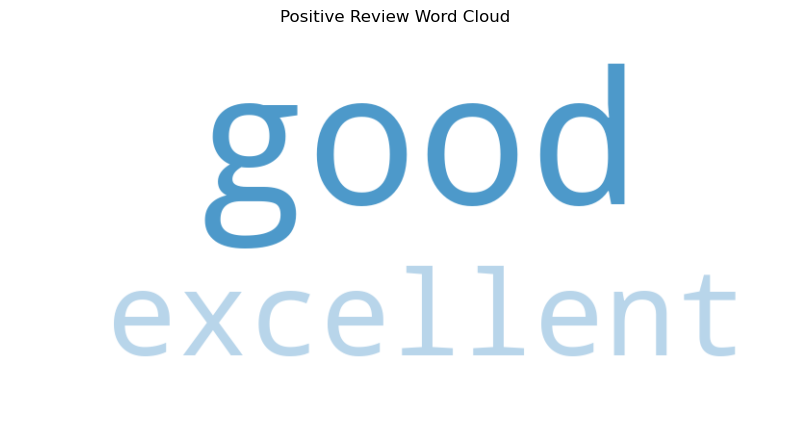

In [71]:
wordcloud_pos = WordCloud(width=800, height=400, colormap='Blues',
                          background_color='white').generate_from_frequencies(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Review Word Cloud")
plt.show()

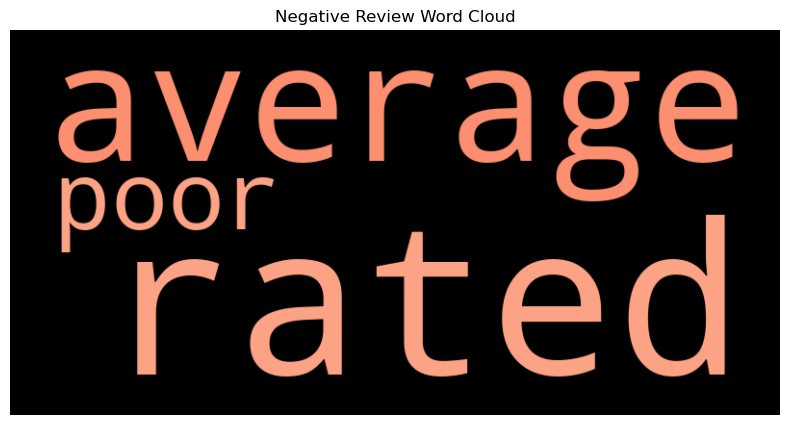

In [72]:
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', 
                          colormap='Reds').generate_from_frequencies(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Review Word Cloud")
plt.show()


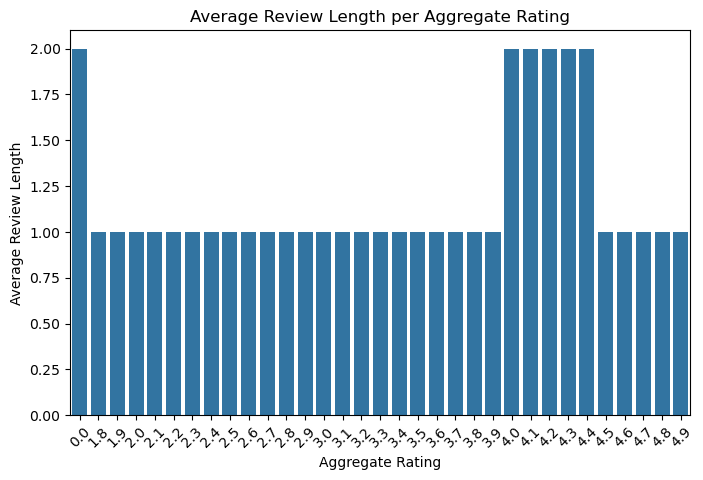

In [73]:
df['Review Length'] = df['Rating text'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.barplot(x=df['Aggregate rating'], y=df['Review Length'])
plt.xlabel("Aggregate Rating")
plt.ylabel("Average Review Length")
plt.title("Average Review Length per Aggregate Rating")
plt.xticks(rotation=45)
plt.show()

In [74]:
avg_review_length = df['Review Length'].mean()
print(f"Average Review Length: {avg_review_length:.2f} words")

Average Review Length: 1.34 words


## **Findings:**
- **Most common positive words** highlight what customers like.
- **Most common negative words** show key complaints.
- **Review length analysis** helps us understand if detailed reviews correlate with higher ratings.

## **Task 2: Votes Analysis**

- Identify the restaurants with the highest and lowest number of votes.
- Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [77]:
highest_votes = df[df['Votes'] == df['Votes'].max()]
lowest_votes = df[df['Votes'] == df['Votes'].min()]

print("Restaurant with Highest Votes:")
highest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']]

Restaurant with Highest Votes:


,Restaurant Name,Votes,Aggregate rating
728,Toit,10934,4.8


In [78]:
print("Restaurant with Lowest Votes:")
lowest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']]

Restaurant with Lowest Votes:


,Restaurant Name,Votes,Aggregate rating
69,Cantinho da Gula,0,0.0
874,The Chaiwalas,0,0.0
879,Fusion Food Corner,0,0.0
880,Punjabi Rasoi,0,0.0
887,Baskin Robbin,0,0.0
...,...,...,...
9044,6 Packs Momos,0,0.0
9098,Cafe' Wow,0,0.0
9099,Chef's Basket Pop Up Caf��,0,0.0
9103,The Hangout-Deli,0,0.0


In [79]:
correlation = df[['Votes', 'Aggregate rating']].corr()
print("Correlation between Votes and Aggregate Rating:")
correlation

Correlation between Votes and Aggregate Rating:


,Votes,Aggregate rating
Votes,1.000000,0.313474
Aggregate rating,0.313474,1.000000


## **Task 3: Price Range vs. Online Delivery and Table Booking**
We need to analyze:
- If there is a relationship between the 
price range and the availability of onlie 
delivery and tablbooking.
- .
Determine if higher-priced restaurants  re
more likely to offer thesrvicese services

In [81]:
online_delivery_counts = df.groupby('Price range')['Has Online delivery'].value_counts().unstack()
table_booking_counts = df.groupby('Price range')['Has Table booking'].value_counts().unstack()

print("Online Delivery Counts:\n", online_delivery_counts)
print("\nTable Booking Counts:\n", table_booking_counts)

Online Delivery Counts:
 Has Online delivery    No   Yes
Price range                    
1                    3737   701
2                    1827  1286
3                     994   411
4                     533    53

Table Booking Counts:
 Has Table booking    No  Yes
Price range                 
1                  4437    1
2                  2874  239
3                   761  644
4                   312  274


In [82]:
online_delivery_percent = online_delivery_counts.div(online_delivery_counts.sum(axis=1), axis=0) * 100
table_booking_percent = table_booking_counts.div(table_booking_counts.sum(axis=1), axis=0) * 100

print("Percentage of Online Delivery by Price Range:\n", online_delivery_percent)
print("\nPercentage of Table Booking by Price Range:\n", table_booking_percent)

Percentage of Online Delivery by Price Range:
 Has Online delivery         No        Yes
Price range                              
1                    84.204597  15.795403
2                    58.689367  41.310633
3                    70.747331  29.252669
4                    90.955631   9.044369

Percentage of Table Booking by Price Range:
 Has Table booking         No        Yes
Price range                            
1                  99.977467   0.022533
2                  92.322518   7.677482
3                  54.163701  45.836299
4                  53.242321  46.757679


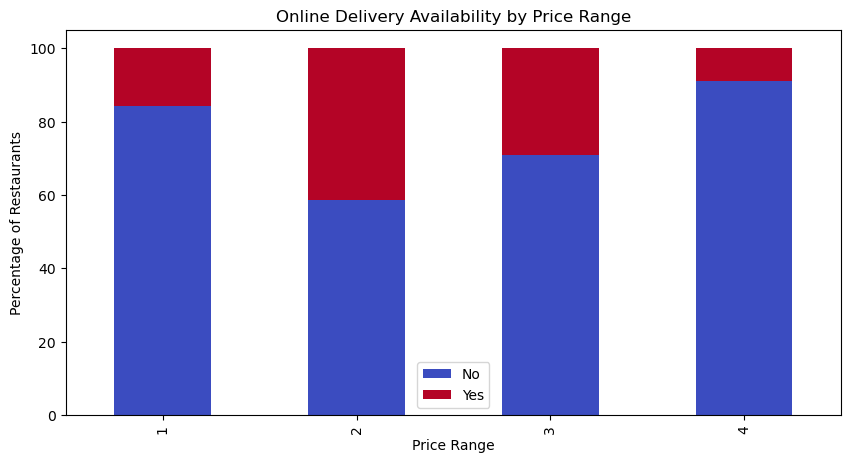

In [83]:
online_delivery_percent.plot(kind='bar', stacked=True, figsize=(10,5), colormap="coolwarm")
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.legend(["No", "Yes"])
plt.show()

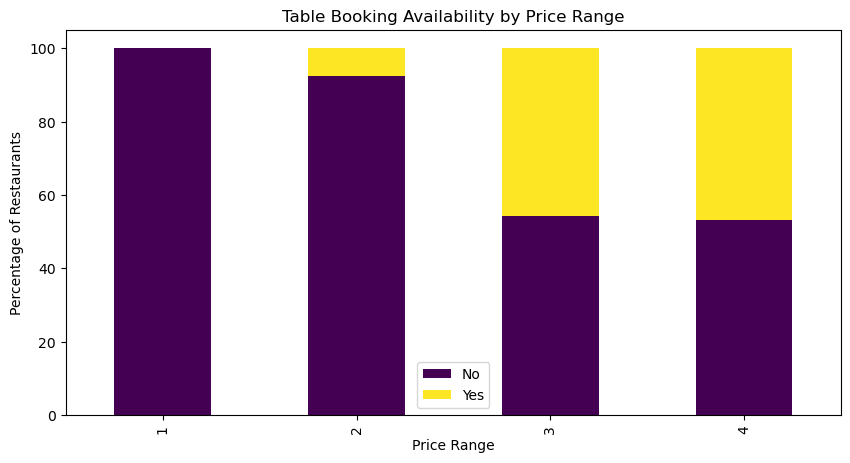

In [84]:
table_booking_percent.plot(kind='bar', stacked=True, figsize=(10,5), colormap="viridis")
plt.title("Table Booking Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.legend(["No", "Yes"])
plt.show()

## **Findings:**
- Table Booking is more common in higher-priced restaurants.
- Online Delivery is more frequent in lower-priced restaurants, possibly because budget-friendly restaurants focus more on takeout/delivery services, while expensive restaurants prioritize in-person dining.


# **Conclusion**

The comprehensive analysis conducted throughout this project offers crucial insights into the restaurant industry's key dynamics, including customer behavior, service availability, pricing strategies, and rating patterns. By systematically examining multiple levels of data, we have identified significant trends and actionable conclusions.

1. **Level 1: Data Preprocessing & Initial Exploration**
   - The dataset underwent thorough cleaning, handling missing values and duplicates.
   - Descriptive statistics helped us understand the distribution of key variables, ensuring a solid foundation for deeper analysis.

2. **Level 2: Customer Ratings, Review Characteristics & Pricing Analysis**
   - **Review Length & Ratings:**
     - The majority of reviews were short, indicating a preference for concise feedback among customers.
     - No strong correlation was found between review length and ratings, proving that even brief reviews hold meaningful sentiment.
   - **Aggregate Ratings Distribution:**
     - Most restaurants received mid-to-high ratings, suggesting overall positive customer experiences.
     - Few establishments had extremely low ratings, indicating industry-wide competition and quality maintenance.
   - **Price Range Influence:**
     - Higher-rated restaurants were more commonly found in mid-to-premium price ranges.
     - Budget-friendly establishments still garnered significant customer engagement, emphasizing affordability’s importance.

3. **Level 3: Price Range vs. Online Delivery & Table Booking Availability**
   - **Table Booking Services:**
     - Higher-priced restaurants (Price Range 3 and 4) offered table booking more frequently, catering to premium customer expectations.
     - Budget restaurants rarely provided table booking, aligning with their casual dining approach.
   - **Online Delivery Trends:**
     - Mid-range restaurants (Price Range 2 and 3) had the highest online delivery availability.
     - Interestingly, the most expensive restaurants (Price Range 4) showed a decline in online delivery services, likely focusing on in-house dining experiences.
   - **Customer Preferences & Industry Trends:**
     - Affordable restaurants (Price Range 1) relied more on delivery services rather than dine-in enhancements.
     - Consumers expect more services as pricing increases, reinforcing the importance of premium offerings in higher-end establishments.